## Saving a Cats v Dogs Model

In [1]:
# Make sure we've got the latest version of fastai:
%pip install -Uqq fastai

Note: you may need to restart the kernel to use updated packages.


In [2]:
from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)/'images'

In [4]:
def is_cat(x): return x[0].isupper() 

In [5]:
dls = ImageDataLoaders.from_name_func('.',
    get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat,
    item_tfms=Resize(192))

In [6]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.192284,0.050137,0.017591,00:54


epoch,train_loss,valid_loss,error_rate,time
0,0.076391,0.050657,0.014208,00:25
1,0.041132,0.029223,0.011502,00:27
2,0.018182,0.016990,0.009472,00:26


In [7]:
learn.export('model.pkl')

In [9]:
from fastbook import *
from fastai.vision.widgets import *

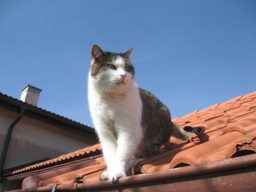

Is this a cat?: True.
Probability it's a cat: 0.999997


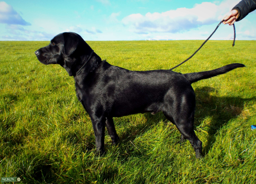

Is this a cat?: False.
Probability it's a cat: 0.000039


In [14]:
# Load back model and test that it works
learn = load_learner('model.pkl')

# Download an image of a cat and dog fortesting
download_url(search_images_ddg('cat', max_images=1)[0], 'cat.jpg', show_progress=False)
download_url(search_images_ddg('dog', max_images=1)[0], 'dog.jpg', show_progress=False)

cat_img = PILImage.create('cat.jpg')
display(cat_img.to_thumb(256,256))
is_cat,_,probs = learn.predict(cat_img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")

dog_img = PILImage.create('dog.jpg')
display(dog_img.to_thumb(256,256))
is_cat,_,probs = learn.predict(dog_img)
print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")